[*********************100%%**********************]  1 of 1 completed


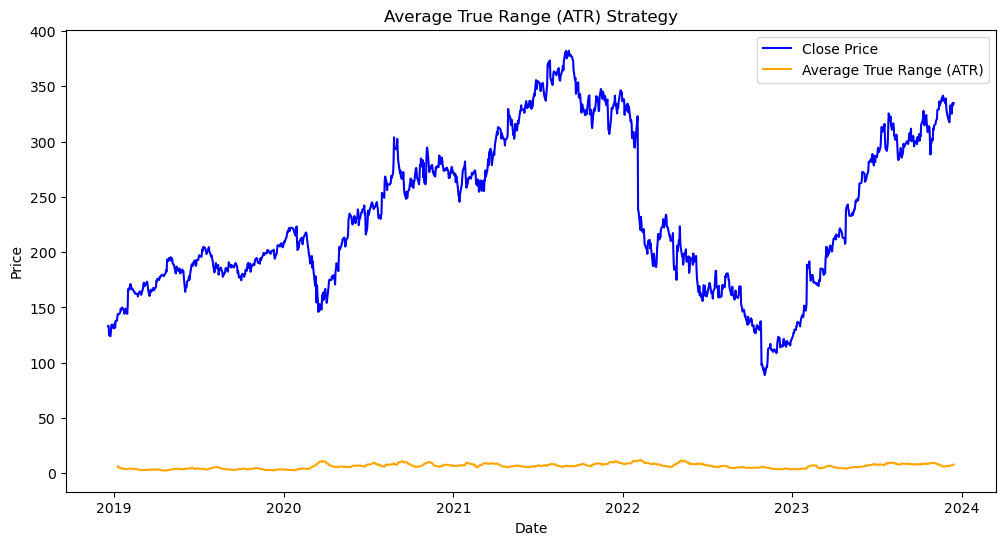

            Signal
Date              
2018-12-19     0.0
2018-12-20     0.0
2018-12-21     0.0
2018-12-24     0.0
2018-12-26     0.0
...            ...
2023-12-11     0.0
2023-12-12     0.0
2023-12-13     0.0
2023-12-14     0.0
2023-12-15     0.0

[1257 rows x 1 columns]


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_atr(data, window=14):
    data['ATR'] = data.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Close']), abs(row['Low'] - row['Close'])), axis=1)
    data['ATR'] = data['ATR'].rolling(window=window).mean()
    data.drop(columns=['ATR'], inplace=True)
    return data

def plot_atr(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['ATR'], label='Average True Range (ATR)', color='orange')
    plt.title('Average True Range (ATR) Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def atr_strategy(data, atr_multiplier=1.5):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0

    # Buy Signal
    signals['Signal'][data['Close'] - atr_multiplier * data['ATR'] > data['Close'].shift(1)] = 1.0

    # Sell Signal
    signals['Signal'][data['Close'] + atr_multiplier * data['ATR'] < data['Close'].shift(1)] = -1.0

    return signals

if __name__ == "__main__":
    # Define the stock ticker, start date, and end date
    stock_ticker = 'META'
    start_date = '2018-12-19'
    end_date = '2023-12-18'

    # Fetch historical stock data
    stock_data = fetch_data(stock_ticker, start_date, end_date)

    # Calculate Average True Range (ATR)
    stock_data = calculate_atr(stock_data)

    # Plot ATR
    plot_atr(stock_data)

    # Generate signals based on ATR
    signals = atr_strategy(stock_data)

    # Print signals
    print(signals)


In [2]:
print(stock_data.head)

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-19  141.210007  144.910004  132.500000  133.240005  133.240005   
2018-12-20  130.699997  135.570007  130.000000  133.399994  133.399994   
2018-12-21  133.389999  134.899994  123.419998  124.949997  124.949997   
2018-12-24  123.099998  129.740005  123.019997  124.059998  124.059998   
2018-12-26  126.000000  134.240005  125.889999  134.179993  134.179993   
...                ...         ...         ...         ...         ...   
2023-12-11  329.399994  329.890015  320.000000  325.279999  325.279999   
2023-12-12  324.600006  334.470001  324.559998  334.220001  334.220001   
2023-12-13  333.929993  338.369995  332.640015  334.739990  334.739990   
2023-12-14  333.850006  334.700012  328.640015  333.170013  333.170013   
2023-12-15  331.989990  338.660004  331.220001  334.920013  334.920013   

       